# Time series for Forecasting

concentrate on anomaly detection and CPD (change point detection)

## Import Library

In [84]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

## Download the data

In [70]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv' 

# add date parser function 
def parser(x):
  return datetime.strptime('190' + x, '%Y-%m')
# parser = lambda x : datetime.strptime('190' + x, '%Y-%m') 
  
shampoo = pd.read_csv(path, header= 0, parse_dates = [0], date_parser= parser, index_col= 0)


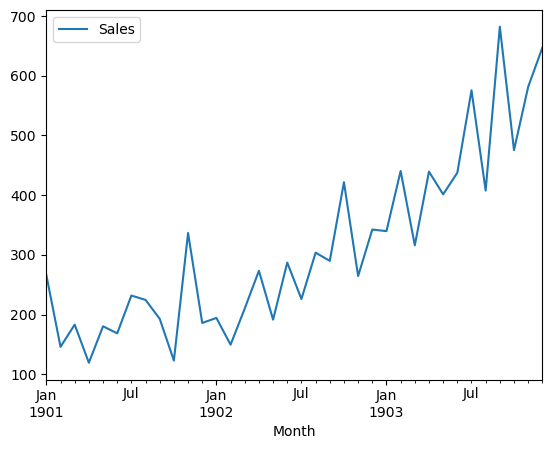

In [71]:
shampoo.plot()
plt.show()

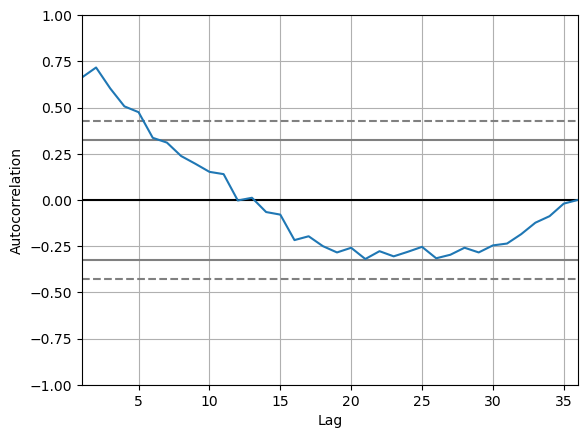

In [72]:
# correlation plot according to lags
autocorrelation_plot(shampoo)
# this shows that parameter of AR with a value of 5 could be a beneficial starting point
plt.show()

## ARIMA

In [73]:
shampoo = shampoo.resample(rule = 'M').mean()

In [74]:
model = ARIMA(shampoo, order = (5, 1, 0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 18 Apr 2024   AIC                            408.969
Time:                        15:33:37   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

## Plot the residual errors

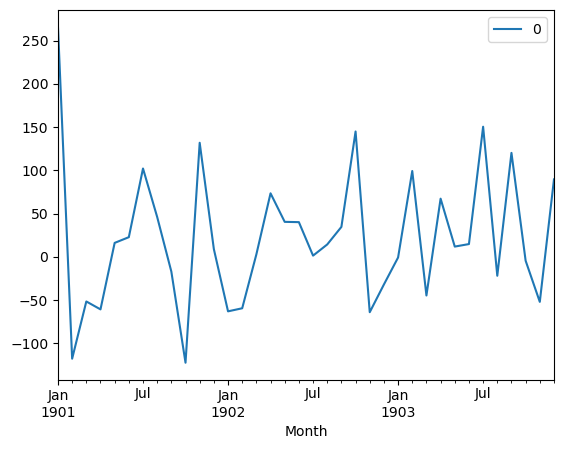

In [75]:
residuals = pd.DataFrame(res.resid)
residuals.plot()
plt.show()

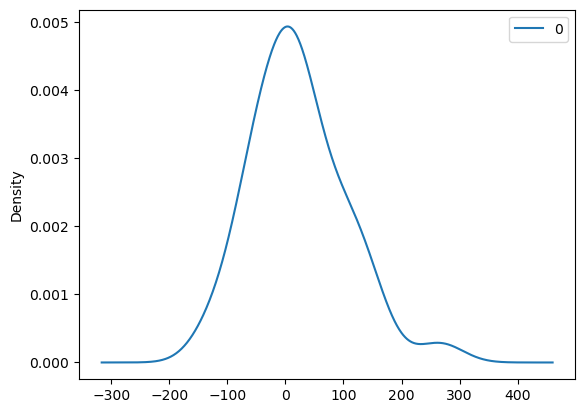

,0
count,36.000000
mean,21.936144
std,80.774430
min,-122.292030
25%,-35.040859
50%,13.147219
75%,68.848286
max,266.000000


In [76]:
# show the density plot of residuals 
residuals.plot(kind = 'kde')
plt.show()
residuals.describe()

## Forecast 

In [78]:
# split the data into train and test
X = shampoo.values
len_s = len(X)
size = int(len_s * 0.66)
train, test = X[: size], X[size:]
history = [x for x in train]
predict = []

# predict 
for t in range(len(test)):
  model = ARIMA(history, order = (5, 1, 0))
  res = model.fit()
  forecasts = res.forecast()
  # put test into history data
  history.append(test[t])
  predict.append(forecasts)
  print('predict = {}, expected = {}'.format(forecasts, test[t]))
# print(predict) 

predict = [343.27218032], expected = [342.3]
predict = [293.32967417], expected = [339.7]
predict = [368.66895569], expected = [440.4]
predict = [335.04474064], expected = [315.9]
predict = [363.22022159], expected = [439.3]
predict = [357.64532363], expected = [401.3]
predict = [443.04783519], expected = [437.4]
predict = [378.36567359], expected = [575.5]
predict = [459.41502004], expected = [407.6]
predict = [526.89087574], expected = [682.]
predict = [457.23127433], expected = [475.3]
predict = [672.9149437], expected = [581.3]
predict = [531.54144921], expected = [646.9]


### Plot the graph

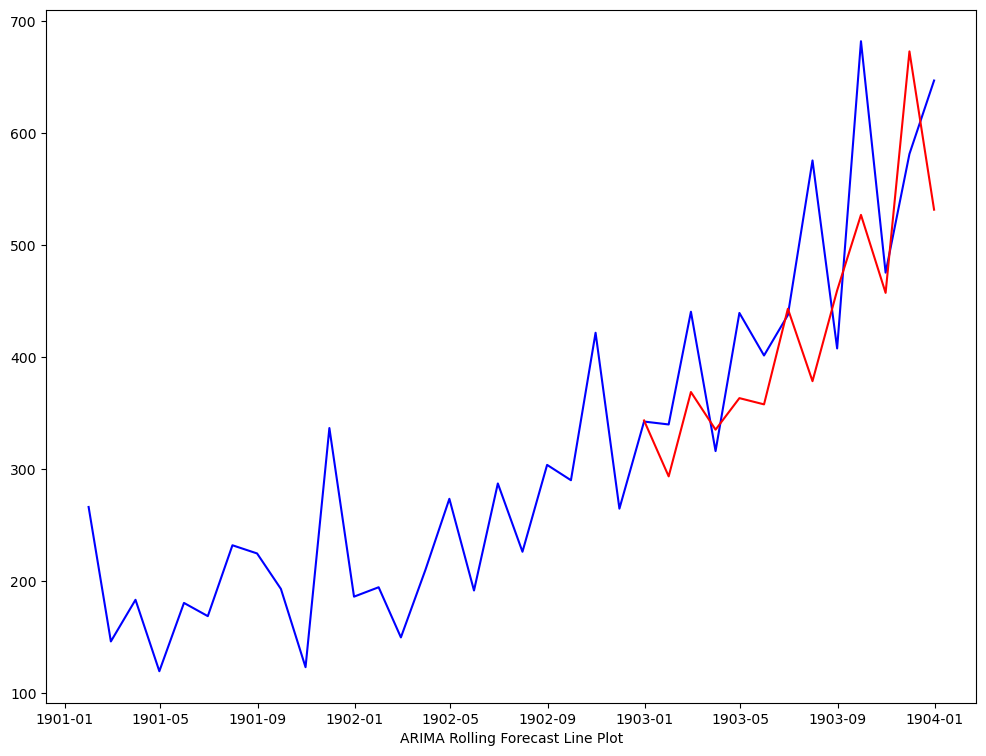

In [107]:

# set the index for predict 
index_list = shampoo.index[size:]

# set a dataframe of predict

prediction = pd.DataFrame(data = predict, index= index_list)

# use forecast plot aganist actual plot
fig, axes = plt.subplots(figsize = (12, 9))
plt.plot(shampoo, color = 'blue')
plt.plot( prediction, color = 'red')
plt.xlabel('ARIMA Rolling Forecast Line Plot')
plt.show()

### RMSE

In [104]:
# calculate the root mean squared error
m = np.square(np.array(history[size:]) - np.array(prediction)).sum() / (len_s - size)
rmse = pow(m, 1/2) 
rmse


89.02105582049391